## Set plots interactive
Allow for interactive plots powered by matplotlib. Execution before running MyOpticsLab ***does*** matter.  

In [1]:
%matplotlib notebook

## Initialise Spectrometers and basic functions#

By running this cell, functions and classes predefined in the python scripts in the *lib* folder are loaded and a scan for connected *Ocean Optics* **spectrometers** is conducted. Once a connection to one or more spectrometers is established, you will be provided with the respective information and control buttons will be invoked for the adjustment of crucial measurement parameters. 

*Warning:*  During this process, access to spectrometers is granted exclusively to (the kernel of) this notebook. *(Should you wish to access the spectrometers from another notebook, first shut down this notebook or restart its kernel.)* 

In [2]:
%run modules/MyOpticsLab.py

## Live Data ViewPort

The next cell invokes a *live data feed* for each of the recognised spectrometers. Now, based on the visual feedback, we can alter some of the **measurement parameters** for the selected spectrometer sing the control buttons above and observe the effects on the corresponding intensity signal.

*Notes*: 
- **Integration time (IT)**: Note that while increasing integration time you will reach a point at which the signal starts to flatten at the upper border. This is not due to the graphics window, but to the saturation of the photodetectors in the spectrometer. This situation has to be avoided, as the signal becomes invariant to other factors. 

Box(children=(Button(description='USB2000plus', icon='pause', style=ButtonStyle(), tooltip='Pause/Resume'),))

<IPython.core.display.Javascript object>


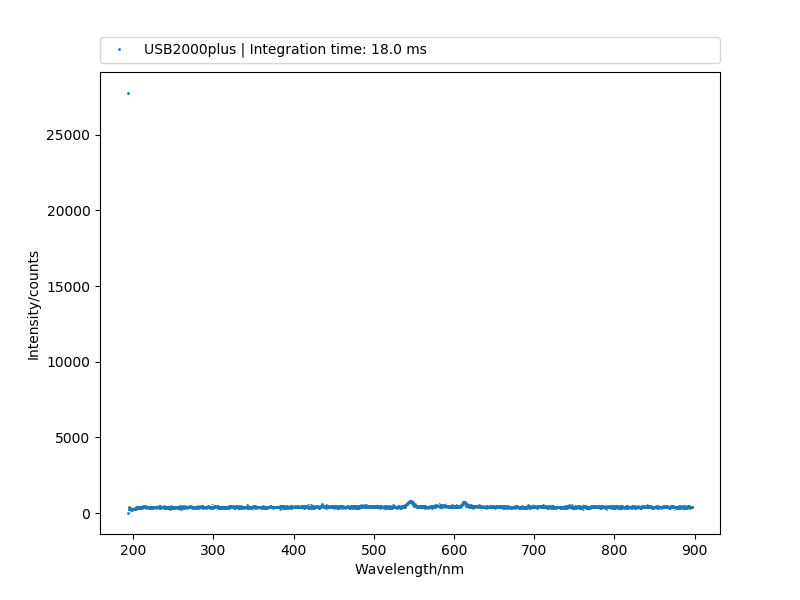

In [3]:
MyLab.show_DataFeed()

## Automised data acquisition#

### *** Define a measurement sequence ***

In [4]:
# Define spectrometer access locally
spectrometer = OO['USB2000plus']

# Define helper function containing the individual steps to be automised
def sequence(spectrometer):
    
    # Define number of spectra averaged through "avg_spec"
    N=1
    
    spectrometer.stream.interrupt()
    
    # Correct ambient light interferences
    # ======================================================
    
    # Get mean of N intensity spectra from spectrometer (returns dictionary!) with lightsource OFF
    spectrometer.light_off()
    Idark = spectrometer.avg_spec(N)
    
    # Get mean of N intensity spectra from spectrometer (returns dictionary!) with lightsource ON
    spectrometer.light_on()
    I = spectrometer.avg_spec(N)
    
    # Substract ambient light mean intensities, Idark['mean_spec'], from mean intensities obtained with lightsource ON 
    # and ambient lights present; I['mean_spec'].
    I['mean_spec'] = I['mean_spec'] - Idark['mean_spec']
    # ======================================================
    spectrometer.light_off()
        
    return I
    

### ***Repeat sequence with period [min]***###
*** write_to *** defines the filename where datasets are stored (in order to save to an existing folder, e.g. "Folder", contained in "Measurement", set `write_to = 'Folder/testfile'`)

In [2]:
# load function definition from file
from modules.repeat import repeat as repeat
help(repeat)

Help on function repeat in module lib.repeat:

repeat(sequence, spectrometer, period_minutes=0.05, write_to='database', zone=None)



In [5]:
# start repeating the sequence
repeat(sequence, spectrometer, write_to='testfile', period_minutes=0.3, experiment_name=None)

Box(children=(Button(button_style='success', description='Running', disabled=True, style=ButtonStyle()), Float…